In [1]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


import utils

In [2]:
#tracks = utils.load('tracks.csv')
#genres = utils.load('genres.csv')
#features = utils.load('features.csv')
#echonest = utils.load('echonest.csv')

tracks = pd.read_csv('tracks.csv')
genres = pd.read_csv('genres.csv')
features = pd.read_csv('features.csv')
echonest = pd.read_csv('echonest.csv')

#np.testing.assert_array_equal(features.index, tracks.index)
#assert echonest.index.isin(tracks.index).all()

#tracks.shape, genres.shape, features.shape, echonest.shape

C:\Users\anast\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\anast\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177

# Preproccessing

In [20]:
tracklist=tracks.loc[0,:]
tracks.columns=tracklist
tracks=tracks.loc[2:,:]
tracks.rename(columns={tracks.columns[0]: "track_id"}, inplace=True)
echonest.rename(columns={echonest.columns[0]: "track_id"}, inplace=True)
features.rename(columns={features.columns[0]: "track_id"}, inplace=True)

KeyError: 0

In [21]:
listft=features.loc[0,:]=='mean'
listft['track_id']=True
listft=features.loc[0,listft]
desired_feat=features.loc[:,listft.index]
desired_feat=desired_feat.loc[3:,:]
#desired_feat=desired_feat.drop(desired_feat.loc[:,'chroma_cens.24':'chroma_stft.35'],axis=1)

In [22]:
listecho=echonest.loc[1,:]
listecho[0]='track_id'
echo=echonest.loc[3:,:]
echo.columns=listecho

In [178]:
clean_tracks = tracks[['track_id',"genre_top"]] 
clean_tracks.drop(clean_tracks.index[0], inplace=True)

# Do you want merge with features? Uncomment the next line
clean_tracks = clean_tracks.merge(desired_feat,on="track_id",how="inner")
# Here we have at least 1000 songs "Classical" if you choose to merge
frequencies = clean_tracks['genre_top'].value_counts()
print("1st step :\n",frequencies)  
# Do you want merge with echonest? Uncomment the next line 
# clean_tracks = clean_tracks.merge(echonest,on="track_id",how="inner")
 
frequencies = clean_tracks['genre_top'].value_counts()
print("2nd step :\n",frequencies) 
     
clean_tracks= clean_tracks.sample(frac=1).reset_index(drop=True)
     
#  selected_genres :
# 'Pop','Rock','Hip-Hop','Classical'
max_tracks_each_genre = 1000 # choose how many songs you will 
classical = clean_tracks[clean_tracks['genre_top'] == 'Classical'].head(max_tracks_each_genre)
rock = clean_tracks[clean_tracks['genre_top'] == 'Rock'].head(max_tracks_each_genre)
hip_hop = clean_tracks[clean_tracks['genre_top'] == 'Hip-Hop'].head(max_tracks_each_genre)
folk = clean_tracks[clean_tracks['genre_top'] == 'Folk'].head(max_tracks_each_genre)
# append each to our final dataset 

final_dataset = pd.DataFrame()
final_dataset = final_dataset.append([classical,hip_hop,rock,folk])
final_dataset = final_dataset.drop('track_id',axis=1)

y=final_dataset['genre_top']
X=final_dataset.drop('genre_top',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

final_dataset.columns

C:\Users\anast\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


1st step :
 Rock                   11127
Experimental            9072
Electronic              7718
Hip-Hop                 2991
Folk                    2141
Pop                     1994
Instrumental            1936
International           1128
Classical               1039
Jazz                     385
Spoken                   344
Old-Time / Historic      215
Soul-RnB                 157
Country                  103
Blues                     58
Easy Listening            23
Name: genre_top, dtype: int64
2nd step :
 Rock                   11127
Experimental            9072
Electronic              7718
Hip-Hop                 2991
Folk                    2141
Pop                     1994
Instrumental            1936
International           1128
Classical               1039
Jazz                     385
Spoken                   344
Old-Time / Historic      215
Soul-RnB                 157
Country                  103
Blues                     58
Easy Listening            23
Name: genre_top, d

Index(['genre_top', 'chroma_cens.24', 'chroma_cens.25', 'chroma_cens.26',
       'chroma_cens.27', 'chroma_cens.28', 'chroma_cens.29', 'chroma_cens.30',
       'chroma_cens.31', 'chroma_cens.32', 'chroma_cens.33', 'chroma_cens.34',
       'chroma_cens.35', 'chroma_cqt.24', 'chroma_cqt.25', 'chroma_cqt.26',
       'chroma_cqt.27', 'chroma_cqt.28', 'chroma_cqt.29', 'chroma_cqt.30',
       'chroma_cqt.31', 'chroma_cqt.32', 'chroma_cqt.33', 'chroma_cqt.34',
       'chroma_cqt.35', 'chroma_stft.24', 'chroma_stft.25', 'chroma_stft.26',
       'chroma_stft.27', 'chroma_stft.28', 'chroma_stft.29', 'chroma_stft.30',
       'chroma_stft.31', 'chroma_stft.32', 'chroma_stft.33', 'chroma_stft.34',
       'chroma_stft.35', 'mfcc.40', 'mfcc.41', 'mfcc.42', 'mfcc.43', 'mfcc.44',
       'mfcc.45', 'mfcc.46', 'mfcc.47', 'mfcc.48', 'mfcc.49', 'mfcc.50',
       'mfcc.51', 'mfcc.52', 'mfcc.53', 'mfcc.54', 'mfcc.55', 'mfcc.56',
       'mfcc.57', 'mfcc.58', 'mfcc.59', 'rmse.2', 'spectral_bandwidth.2',
      

# Feature Selection

### Selection with Extra Trees Classifier

[0.00733395 0.00562127 0.00676569 0.00805395 0.00871023 0.00769548
 0.00524464 0.00728012 0.00634425 0.0060514  0.00728427 0.00837831
 0.00898366 0.01235616 0.00691639 0.00679811 0.0092128  0.01081851
 0.00741654 0.00693798 0.00646797 0.00725721 0.00722586 0.006898
 0.01811357 0.0182447  0.01732543 0.0117422  0.02045701 0.00691527
 0.0068655  0.01169845 0.00880547 0.00947655 0.01832909 0.01364089
 0.05085687 0.02354482 0.02908623 0.02755702 0.00920211 0.01479249
 0.00851358 0.01611355 0.00726402 0.0228422  0.00860401 0.01172083
 0.00846854 0.00928633 0.01041137 0.01651716 0.01044237 0.01928632
 0.01982949 0.01953636 0.02210998 0.01589215 0.01514079 0.01215518
 0.02849719 0.02162095 0.06112873 0.02681016 0.00806552 0.02461432
 0.01725553 0.00659067 0.00948603 0.00763198 0.00702794 0.00782224
 0.01009225 0.01051588]


C:\Users\anast\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


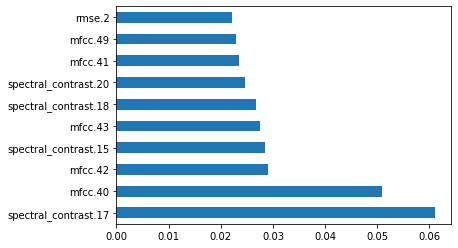

In [136]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
X_extree=feat_importances.nlargest(10).index
plt.show()

In [141]:
X_extree

Index(['spectral_contrast.17', 'mfcc.40', 'mfcc.42', 'spectral_contrast.15',
       'mfcc.43', 'spectral_contrast.18', 'spectral_contrast.20', 'mfcc.41',
       'mfcc.49', 'rmse.2'],
      dtype='object')

### Selection with RFE - LogisticRegression

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=10, step=1)
X_train_rfe_logistic = sel_rfe_logistic.fit_transform(X_train, y_train)
print(sel_rfe_logistic.get_support())
col_log=X.loc[:,sel_rfe_logistic.get_support()].columns
col_log

C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\anast\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

[False False False False False False False False False False False False
  True False False  True False False  True False False False False  True
  True False  True False  True False False False False  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


Index(['chroma_cqt.24', 'chroma_cqt.27', 'chroma_cqt.30', 'chroma_cqt.35',
       'chroma_stft.24', 'chroma_stft.26', 'chroma_stft.28', 'chroma_stft.33',
       'chroma_stft.34', 'chroma_stft.35'],
      dtype='object')

### Selection with RFE - RandomForest

In [147]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=10, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())
col_ranfor=X.loc[:,sel_rfe_tree.get_support()].columns

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True False False False False False False False False
 False False False False False  True False False  True False False False
  True  True  True False False  True False False False False False False
 False False]


In [148]:
col_ranfor

Index(['mfcc.40', 'mfcc.41', 'mfcc.42', 'mfcc.43', 'mfcc.57', 'rmse.2',
       'spectral_contrast.15', 'spectral_contrast.16', 'spectral_contrast.17',
       'spectral_contrast.20'],
      dtype='object')

### Select From Model - LogisticRegr

In [149]:
from sklearn.feature_selection import SelectFromModel

model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, penalty='l1')
sel_model_logistic = SelectFromModel(estimator=model_logistic)
X_train_sfm_l1 = sel_model_logistic.fit_transform(X_train, y_train)
print(sel_model_logistic.get_support())
col_selLog=X.loc[:,sel_rfe_logistic.get_support()].columns

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False False
 False False]


In [150]:
col_selLog

Index(['chroma_cqt.24', 'chroma_cqt.27', 'chroma_cqt.30', 'chroma_cqt.35',
       'chroma_stft.24', 'chroma_stft.26', 'chroma_stft.28', 'chroma_stft.33',
       'chroma_stft.34', 'chroma_stft.35'],
      dtype='object')

### Select From Model - RandomForest

In [32]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
model_tree.fit(X_train, y_train)
print(model_tree.feature_importances_)
sel_model_tree = SelectFromModel(estimator=model_tree, prefit=True, threshold='mean')  
      # since we already fit the data, we specify prefit option here
      # Features whose importance is greater or equal to the threshold are kept while the others are discarded.
X_train_sfm_tree = sel_model_tree.transform(X_train)
print(sel_model_tree.get_support())
col_selRand=X.loc[:,sel_model_tree.get_support()].columns
col_selRand

[0.0064618  0.00574519 0.00652561 0.00755066 0.00708112 0.00712613
 0.00659728 0.00654366 0.00671087 0.006759   0.00688268 0.00711087
 0.00729764 0.00680976 0.00730326 0.0063335  0.00844697 0.00765817
 0.00758864 0.00771096 0.00668781 0.00685239 0.00689609 0.00830073
 0.00926757 0.01035665 0.01335029 0.01075553 0.01096607 0.01132459
 0.00838844 0.00808528 0.01040288 0.01487047 0.01202435 0.01758928
 0.04060831 0.02316589 0.03217171 0.018579   0.00974915 0.01877895
 0.00987389 0.01062472 0.00927006 0.01188891 0.00967183 0.00772537
 0.00787257 0.01095155 0.01075257 0.01474105 0.01527516 0.02715912
 0.01510538 0.01499496 0.05144245 0.0188662  0.02141509 0.01053833
 0.04542547 0.04022161 0.03913794 0.02112292 0.00952522 0.02708837
 0.0320811  0.00936556 0.00935499 0.00656853 0.00648259 0.00783308
 0.00819427 0.01001391]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False F

Index(['chroma_stft.33', 'chroma_stft.35', 'mfcc.40', 'mfcc.41', 'mfcc.42',
       'mfcc.43', 'mfcc.45', 'mfcc.55', 'mfcc.56', 'mfcc.57', 'mfcc.58',
       'mfcc.59', 'rmse.2', 'spectral_bandwidth.2', 'spectral_centroid.2',
       'spectral_contrast.15', 'spectral_contrast.16', 'spectral_contrast.17',
       'spectral_contrast.18', 'spectral_contrast.20', 'spectral_rolloff.2'],
      dtype='object')

# We see that mfcc and spectral_contrast seems to have a great impact on classification so we drop some features

In [179]:
X_train=X_train.drop(X_train.loc[:,:'chroma_stft.35'],axis=1)
X_train=X_train.drop(X_train.loc[:,'tonnetz.12':],axis=1)
X_test=X_test.drop(X_test.loc[:,:'chroma_stft.35'],axis=1)
X_test=X_test.drop(X_test.loc[:,'tonnetz.12':],axis=1)
X_train.columns

Index(['mfcc.40', 'mfcc.41', 'mfcc.42', 'mfcc.43', 'mfcc.44', 'mfcc.45',
       'mfcc.46', 'mfcc.47', 'mfcc.48', 'mfcc.49', 'mfcc.50', 'mfcc.51',
       'mfcc.52', 'mfcc.53', 'mfcc.54', 'mfcc.55', 'mfcc.56', 'mfcc.57',
       'mfcc.58', 'mfcc.59', 'rmse.2', 'spectral_bandwidth.2',
       'spectral_centroid.2', 'spectral_contrast.14', 'spectral_contrast.15',
       'spectral_contrast.16', 'spectral_contrast.17', 'spectral_contrast.18',
       'spectral_contrast.19', 'spectral_contrast.20', 'spectral_rolloff.2'],
      dtype='object')

# Classifiers

              precision    recall  f1-score   support

        Folk       0.78      0.81      0.79       199
        Rock       0.81      0.76      0.79       198
     Hip-Hop       0.78      0.79      0.78       204
   Classical       0.92      0.92      0.92       199

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

[[161  13  17   8]
 [ 19 151  24   4]
 [ 19  20 161   4]
 [  8   2   5 184]]


NameError: name 'method' is not defined

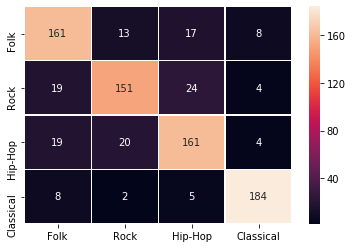

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics


clf = ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=0)
#scores = cross_val_score(clf, X_train, y_train, cv=20)
#scores.mean()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels=['Folk','Rock','Hip-Hop','Classical'])
print(metrics.classification_report(y_test,y_pred,labels=['Folk','Rock','Hip-Hop','Classical']))
print(cm)
cm_df = pd.DataFrame(cm,index=['Folk','Rock','Hip-Hop','Classical'],
                     columns=['Folk','Rock','Hip-Hop','Classical'])
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm_df, annot=True,linewidths=.2,fmt="d")
plt.title('{0} | Accuracy:{1:.3f}'.format(method, metrics.accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.get_ylim()
ax.set_ylim(4.4, 0) # !adjust the y limit to look better
plt.show()

              precision    recall  f1-score   support

        Folk       0.78      0.83      0.80       199
        Rock       0.82      0.77      0.79       198
     Hip-Hop       0.81      0.79      0.80       204
   Classical       0.92      0.92      0.92       199

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800

[[165  12  12  10]
 [ 20 153  22   3]
 [ 20  19 161   4]
 [  7   3   5 184]]


NameError: name 'method' is not defined

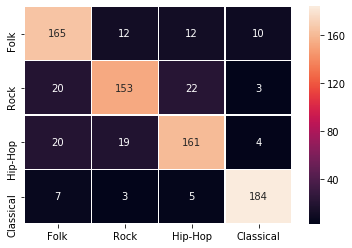

In [187]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GradientBoostingClassifier(n_estimators=100)

eclf = VotingClassifier(estimators=[ ('rf', clf2), ('gnb', clf3)],voting='soft')

#for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'Exta Trees', 'Ensemble']):
#    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
#    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels=['Folk','Rock','Hip-Hop','Classical'])
print(metrics.classification_report(y_test,y_pred,labels=['Folk','Rock','Hip-Hop','Classical']))
print(cm)
cm_df = pd.DataFrame(cm,index=['Folk','Rock','Hip-Hop','Classical'],
                     columns=['Folk','Rock','Hip-Hop','Classical'])
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm_df, annot=True,linewidths=.2,fmt="d")
plt.title('{0} | Accuracy:{1:.3f}'.format(method, metrics.accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.get_ylim()
ax.set_ylim(4.4, 0) # !adjust the y limit to look better
plt.show()

              precision    recall  f1-score   support

        Folk       0.78      0.83      0.80       199
        Rock       0.82      0.77      0.79       198
     Hip-Hop       0.81      0.79      0.80       204
   Classical       0.92      0.92      0.92       199

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800

[[165  12  12  10]
 [ 20 153  22   3]
 [ 20  19 161   4]
 [  7   3   5 184]]


NameError: name 'method' is not defined

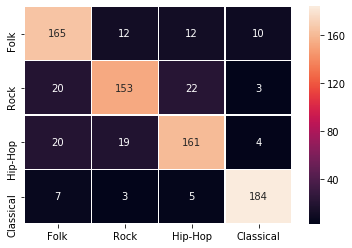

In [189]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100)
#scores = cross_val_score(clf, X, y, cv=10)
#scores.mean()

clf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels=['Folk','Rock','Hip-Hop','Classical'])
print(metrics.classification_report(y_test,y_pred,labels=['Folk','Rock','Hip-Hop','Classical']))
print(cm)
cm_df = pd.DataFrame(cm,index=['Folk','Rock','Hip-Hop','Classical'],
                     columns=['Folk','Rock','Hip-Hop','Classical'])
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm_df, annot=True,linewidths=.2,fmt="d")
plt.title('{0} | Accuracy:{1:.3f}'.format(method, metrics.accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.get_ylim()
ax.set_ylim(4.4, 0) # !adjust the y limit to look better
plt.show()

              precision    recall  f1-score   support

        Folk       0.69      0.73      0.71       199
        Rock       0.75      0.71      0.73       198
     Hip-Hop       0.74      0.70      0.72       204
   Classical       0.86      0.90      0.88       199

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800

[[145  15  20  19]
 [ 26 141  26   5]
 [ 27  29 143   5]
 [ 13   4   3 179]]


NameError: name 'method' is not defined

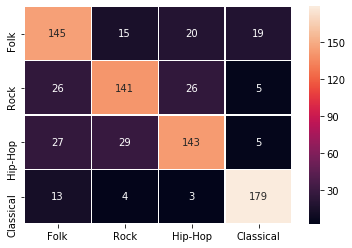

In [191]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred, labels=['Folk','Rock','Hip-Hop','Classical'])
print(metrics.classification_report(y_test,y_pred,labels=['Folk','Rock','Hip-Hop','Classical']))
print(cm)
cm_df = pd.DataFrame(cm,index=['Folk','Rock','Hip-Hop','Classical'],
                     columns=['Folk','Rock','Hip-Hop','Classical'])
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(cm_df, annot=True,linewidths=.2,fmt="d")
plt.title('{0} | Accuracy:{1:.3f}'.format(method, metrics.accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax.get_ylim()
ax.set_ylim(4.4, 0) # !adjust the y limit to look better
plt.show()

# Dataset with echonest and features 

In [48]:
echo_test=echo.loc[:,:'valence']
echo_test=echo_test.merge(tracks[['track_id','genre_top']],on='track_id',how='inner')
echo_test=echo_test.merge(desired_feat,on='track_id',how='inner')
echo_test['genre_top'].value_counts()

Rock                   2085
Electronic             1186
Hip-Hop                 422
Folk                    382
Pop                     212
Jazz                    143
Classical               105
International            64
Old-Time / Historic      62
Instrumental             48
Experimental             17
Blues                    17
Name: genre_top, dtype: int64

In [171]:
echo_test= echo_test.sample(frac=1).reset_index(drop=True)
     
#  selected_genres :
# 'Pop','Rock','Hip-Hop','Classical'
max_tracks_each_genre = 450 # choose how many songs you will 
elec = echo_test[echo_test['genre_top'] == 'Electronic'].head(max_tracks_each_genre)
rock = echo_test[echo_test['genre_top'] == 'Rock'].head(max_tracks_each_genre)
hip_hop = echo_test[echo_test['genre_top'] == 'Hip-Hop'].head(max_tracks_each_genre)
folk = echo_test[echo_test['genre_top'] == 'Folk']
# append each to our final dataset 
     
final = pd.DataFrame()
final = final.append([elec,hip_hop,rock,folk])
#final = final.append([elec,rock,hip_hop])

In [172]:
y=final['genre_top']
X=final.loc[:,'acousticness':]

In [173]:
X=X.drop(['tempo','liveness','valence','genre_top'],axis=1)
X=X.drop(X.loc[:,'tonnetz.12':],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
#X_train=X_train.drop(X_train.loc[:,'mfcc.40':'mfcc.59'],axis=1)

In [170]:
X_train

,mfcc.40,mfcc.41,mfcc.42,mfcc.43,mfcc.44,mfcc.45,mfcc.46,mfcc.47,mfcc.48,mfcc.49,...,spectral_bandwidth.2,spectral_centroid.2,spectral_contrast.14,spectral_contrast.15,spectral_contrast.16,spectral_contrast.17,spectral_contrast.18,spectral_contrast.19,spectral_contrast.20,spectral_rolloff.2
16035,-288.139,130.501,1.38065,19.6603,1.39616,8.82756,1.70879,9.95658,3.79799,4.29264,...,1357.85,1040.91,18.8776,15.0365,18.898,17.9042,18.8077,18.6591,28.6561,2042.94
2249,-238.301,119.026,-20.4527,24.8342,0.108419,20.2986,-4.64062,1.12557,-7.20892,1.98429,...,1591.76,1562.72,20.1671,16.7218,17.2548,18.2113,18.5628,18.3753,35.24,3100.37
7898,-354.883,164.335,-12.9295,3.60706,-2.27736,-9.62574,-10.7968,-4.87833,-5.97524,-11.8669,...,1671.47,1211.46,18.7723,14.5275,16.7216,16.0574,18.4501,19.7442,26.2906,2453.11
38744,-334.004,148.637,19.1644,40.7692,31.3477,23.6917,16.6098,23.4675,14.5575,6.32423,...,929.403,513.911,18.7142,17.034,18.0763,17.4103,18.8405,18.0449,28.8818,976.638
84964,-510.62,153.103,30.2485,17.6073,21.4562,10.4812,0.376699,-0.415058,4.93421,-0.197895,...,1409.63,691.199,16.8563,19.2063,20.6507,18.4127,19.1097,20.0592,23.7926,1126.94
22414,-472.594,68.3982,26.0943,15.6607,7.72465,4.63339,3.45056,2.17165,1.6633,1.26517,...,1987.57,1321.73,15.2743,14.5731,17.6502,16.1166,15.6717,15.9202,15.3682,2708.14
87055,-333.497,175.197,7.69804,7.51873,6.39741,-14.1018,-18.0532,4.05659,5.50949,-17.5353,...,1140.03,713.621,18.2009,18.1587,22.2359,17.9622,21.8568,15.7699,28.7194,1282.94
17463,-214.396,97.7808,-24.8014,59.1477,-0.521746,28.3501,5.04711,20.2622,6.76615,9.83711,...,1878.54,1691.44,21.0766,12.8337,15.2574,17.2951,19.701,20.1971,39.7937,3435.85
1627,-240.407,128.889,-39.7446,29.9964,5.37509,30.4193,-9.66417,8.09012,-3.21085,6.44846,...,1420.75,1369.21,19.255,13.8428,16.4608,16.3882,17.7825,18.771,32.2525,2741.82
22466,-256.429,131.223,-10.2455,61.6319,-4.17676,28.5727,-16.2505,1.59846,0.0124637,-16.2607,...,1508.09,1416.34,18.0837,19.1837,20.1131,19.4024,23.6112,22.426,33.5998,2942.05
